In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
x_train = np.array([[4.7],[2.4],[7.5],[7.1],[4.3],[7.816],
                   [8.9],[5.2],[8.59],[2.1],[8],
                   [10],[4.5],[6],[4]], dtype = np.float32)

y_train = np.array([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357],
                    [2.6],[1.96],[3.53],[1.76],[3.2],
                    [3.5],[1.6],[2.5],[2.2]], dtype = np.float32)

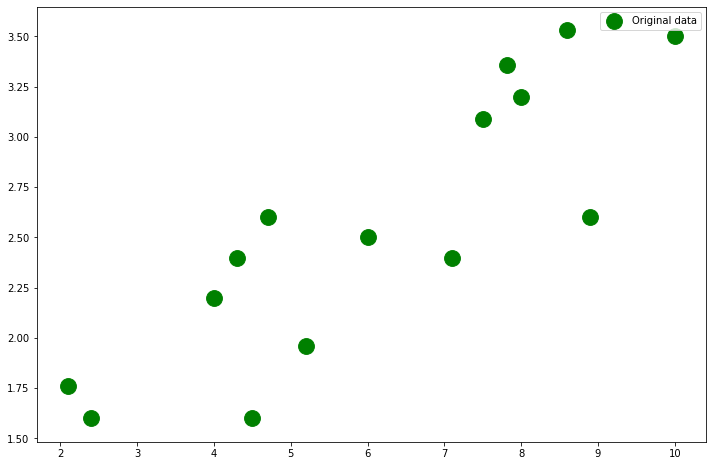

In [85]:
plt.figure(figsize=(12, 8))

plt.scatter(x_train, y_train, label='Original data', s=250, c='g')

plt.legend()
plt.show()

In [86]:
import torch

In [87]:
# Converting x_train and y_train into torch tensors
X_train = torch.from_numpy(x_train)
Y_train = torch.from_numpy(y_train)

print('requires_grad for X_train: ', X_train.requires_grad)
print('requires_grad for Y_train: ', Y_train.requires_grad)

requires_grad for X_train:  False
requires_grad for Y_train:  False


In [88]:
# Setting up the variables
input_size = 1
hidden_size = 1
output_size = 1

In [89]:
w1 = torch.rand(input_size,
                hidden_size,
                
                requires_grad=True)

w1.shape

torch.Size([1, 1])

In [90]:
w2 = torch.rand(hidden_size,
                output_size,
                
                
                requires_grad=True)

w2.shape

torch.Size([1, 1])

In [91]:
learning_rate = 1e-6

In [104]:
for iter in range(0,3000):
    y_pred = X_train.mm(w1).mm(w2)
    loss = (y_pred - Y_train).pow(2).sum()
    
    
    if iter % 50 ==0:
        print(iter, loss.item())
        
    loss.backward()
    
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        w1.grad.zero_()
        w2.grad.zero_()

0 4.4925432205200195
50 4.454294681549072
100 4.419577121734619
150 4.3880839347839355
200 4.359522342681885
250 4.333630561828613
300 4.310168743133545
350 4.288909435272217
400 4.2696614265441895
450 4.252237319946289
500 4.2364678382873535
550 4.222198486328125
600 4.209292411804199
650 4.197621822357178
700 4.187071323394775
750 4.1775360107421875
800 4.168919086456299
850 4.161134243011475
900 4.154102325439453
950 4.147752285003662
1000 4.142018795013428
1050 4.136842727661133
1100 4.132170677185059
1150 4.127954006195068
1200 4.124149799346924
1250 4.120718002319336
1300 4.117621421813965
1350 4.1148271560668945
1400 4.112308502197266
1450 4.110037803649902
1500 4.10798978805542
1550 4.106144428253174
1600 4.104480266571045
1650 4.10297966003418
1700 4.101627826690674
1750 4.100409507751465
1800 4.099311828613281
1850 4.098321914672852
1900 4.097430229187012
1950 4.096627712249756
2000 4.095904350280762
2050 4.095252513885498
2100 4.094666004180908
2150 4.094137191772461
2200 4.

In [105]:
print ('w1: ', w1)
print ('w2: ', w2)

w1:  tensor([[0.7343]], requires_grad=True)
w2:  tensor([[0.5386]], requires_grad=True)


In [106]:
x_train_tensor = torch.from_numpy(x_train)
x_train_tensor

tensor([[ 4.7000],
        [ 2.4000],
        [ 7.5000],
        [ 7.1000],
        [ 4.3000],
        [ 7.8160],
        [ 8.9000],
        [ 5.2000],
        [ 8.5900],
        [ 2.1000],
        [ 8.0000],
        [10.0000],
        [ 4.5000],
        [ 6.0000],
        [ 4.0000]])

In [107]:
predicted_in_tensor = x_train_tensor.mm(w1).mm(w2)
predicted_in_tensor

tensor([[1.8589],
        [0.9492],
        [2.9664],
        [2.8082],
        [1.7007],
        [3.0914],
        [3.5201],
        [2.0567],
        [3.3975],
        [0.8306],
        [3.1642],
        [3.9552],
        [1.7798],
        [2.3731],
        [1.5821]], grad_fn=<MmBackward>)

In [108]:
predicted = predicted_in_tensor.detach().numpy()
predicted

array([[1.8589453 ],
       [0.94924873],
       [2.966402  ],
       [2.808194  ],
       [1.7007372 ],
       [3.0913866 ],
       [3.5201302 ],
       [2.0567055 ],
       [3.397519  ],
       [0.8305925 ],
       [3.1641622 ],
       [3.9552028 ],
       [1.7798413 ],
       [2.3731215 ],
       [1.5820811 ]], dtype=float32)

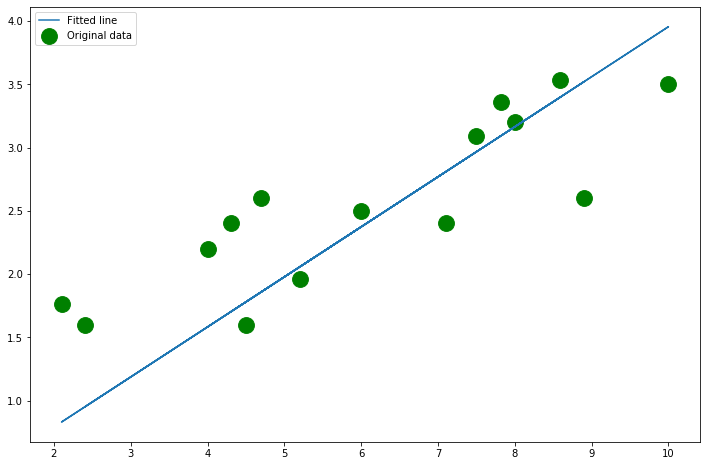

In [109]:
plt.figure(figsize=(12,8))

plt.scatter(x_train, y_train, label = 'Original data' , s=250, c='g')

plt.plot(x_train, predicted, label = 'Fitted line')

plt.legend()

plt.show()